## Clone the Repository

In [ ]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1418, done.
remote: Counting objects: 100% (514/514), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 1418 (delta 379), reused 389 (delta 331), pack-reused 904 (from 1)
Receiving objects: 100% (1418/1418), 12.84 MiB | 20.04 MiB/s, done.
Resolving deltas: 100% (961/961), done.


In [ ]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [ ]:
# Install the Requirements
!pip install -r requirements.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Creación del archivo .YAML

In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/drive/MyDrive/TESIS/YOLOV8/data_grieta/images/train'
TRAIN_DIR_LABELS: '/content/drive/MyDrive/TESIS/YOLOV8/data_grieta/labels/train'
VALID_DIR_IMAGES: '/content/drive/MyDrive/TESIS/YOLOV8/data_grieta/images/valid'
VALID_DIR_LABELS: '/content/drive/MyDrive/TESIS/YOLOV8/data_grieta/labels/valid'

# Class names.
CLASSES: [
    '__background__',
    'grietas'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 2

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [ ]:
import os
import xml.etree.ElementTree as ET

def update_xml_labels(directory, old_label, new_label):
    for filename in os.listdir(directory):
        if filename.endswith(".xml"):
            file_path = os.path.join(directory, filename)
            tree = ET.parse(file_path)
            root = tree.getroot()
            for member in root.findall("object"):
                name = member.find("name")
                if name.text == old_label:
                    name.text = new_label
            tree.write(file_path)

# Llamar la función para actualizar tus etiquetas
update_xml_labels("/content/drive/MyDrive/TESIS/ENTRENEMIENTO_FASTER_RCNN_RESNET50/data_grieta/train/labels", "Grieta", "grietas")  # Cambia Grieta a grietas
update_xml_labels("/content/drive/MyDrive/TESIS/ENTRENEMIENTO_FASTER_RCNN_RESNET50/data_grieta/valid/labels", "Grieta", "grietas")


## Training

In [ ]:
!python train.py --data data_configs/custom_data.yaml --epochs 400 --model fasterrcnn_resnet50_fpn_v2 --name Tuberías_Incrustadas1 --batch 8

2024-11-02 00:57:16.823697: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 00:57:16.841479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 00:57:16.862921: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 00:57:16.869318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 00:57:16.885067: I tensorflow/core/platform/cpu_feature_guar

## Visualize Validation Results

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

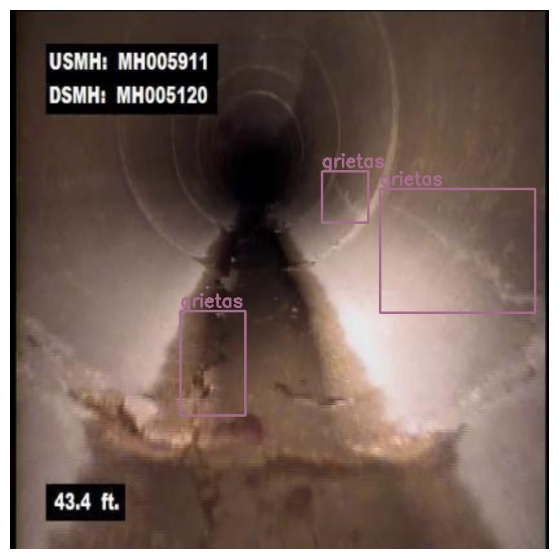

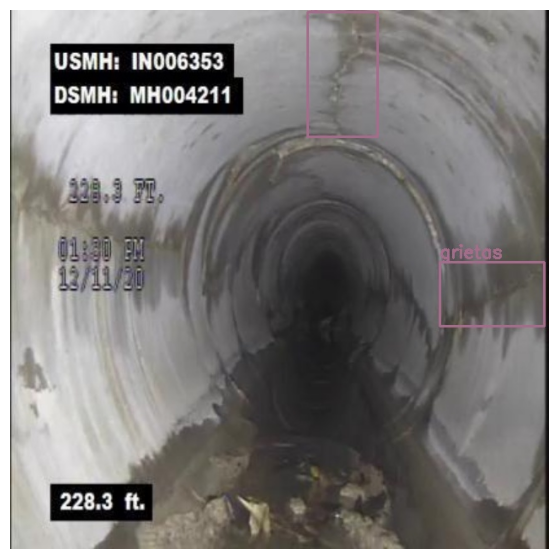

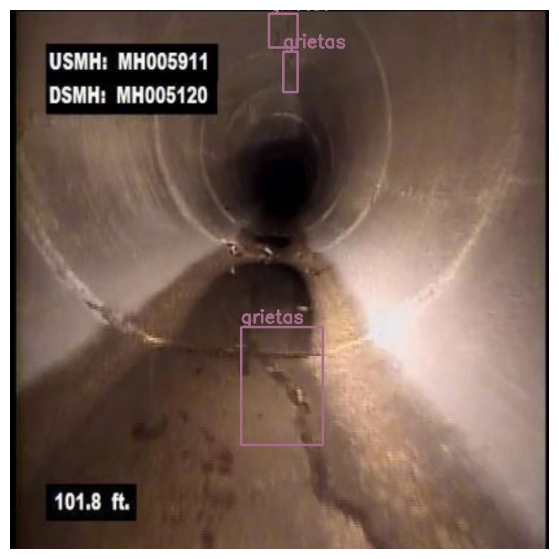

In [ ]:
results_dir_path = '/content/drive/MyDrive/TESIS/GRIETASFASTER/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
!python /content/fastercnn-pytorch-training-pipeline/inference.py \
  --weights /content/drive/MyDrive/TESIS/GRIETASFASTER/custom_training/best_model.pth \
  --input /content/drive/MyDrive/TESIS/YOLOV8/data_grieta/images/valid \
  --mpl-show




2024-11-18 19:27:18.794181: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 19:27:18.810281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 19:27:18.831094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 19:27:18.837456: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 19:27:18.852563: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!scp -r /content/fastercnn-pytorch-training-pipeline/outputs/inference '/content/drive/MyDrive/TESIS/GRIETASFASTER'

In [ ]:
!scp -r /content/fastercnn-pytorch-training-pipeline/outputs/training/Tuberías_Incrustadas1 '/content/drive/MyDrive/TESIS/TUBERIASINCRUSTADASFASTER'

Check Out the Repo for Latest Updates
https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation